# FOOTBALL PLAYERS ANALYSIS 2021-2022


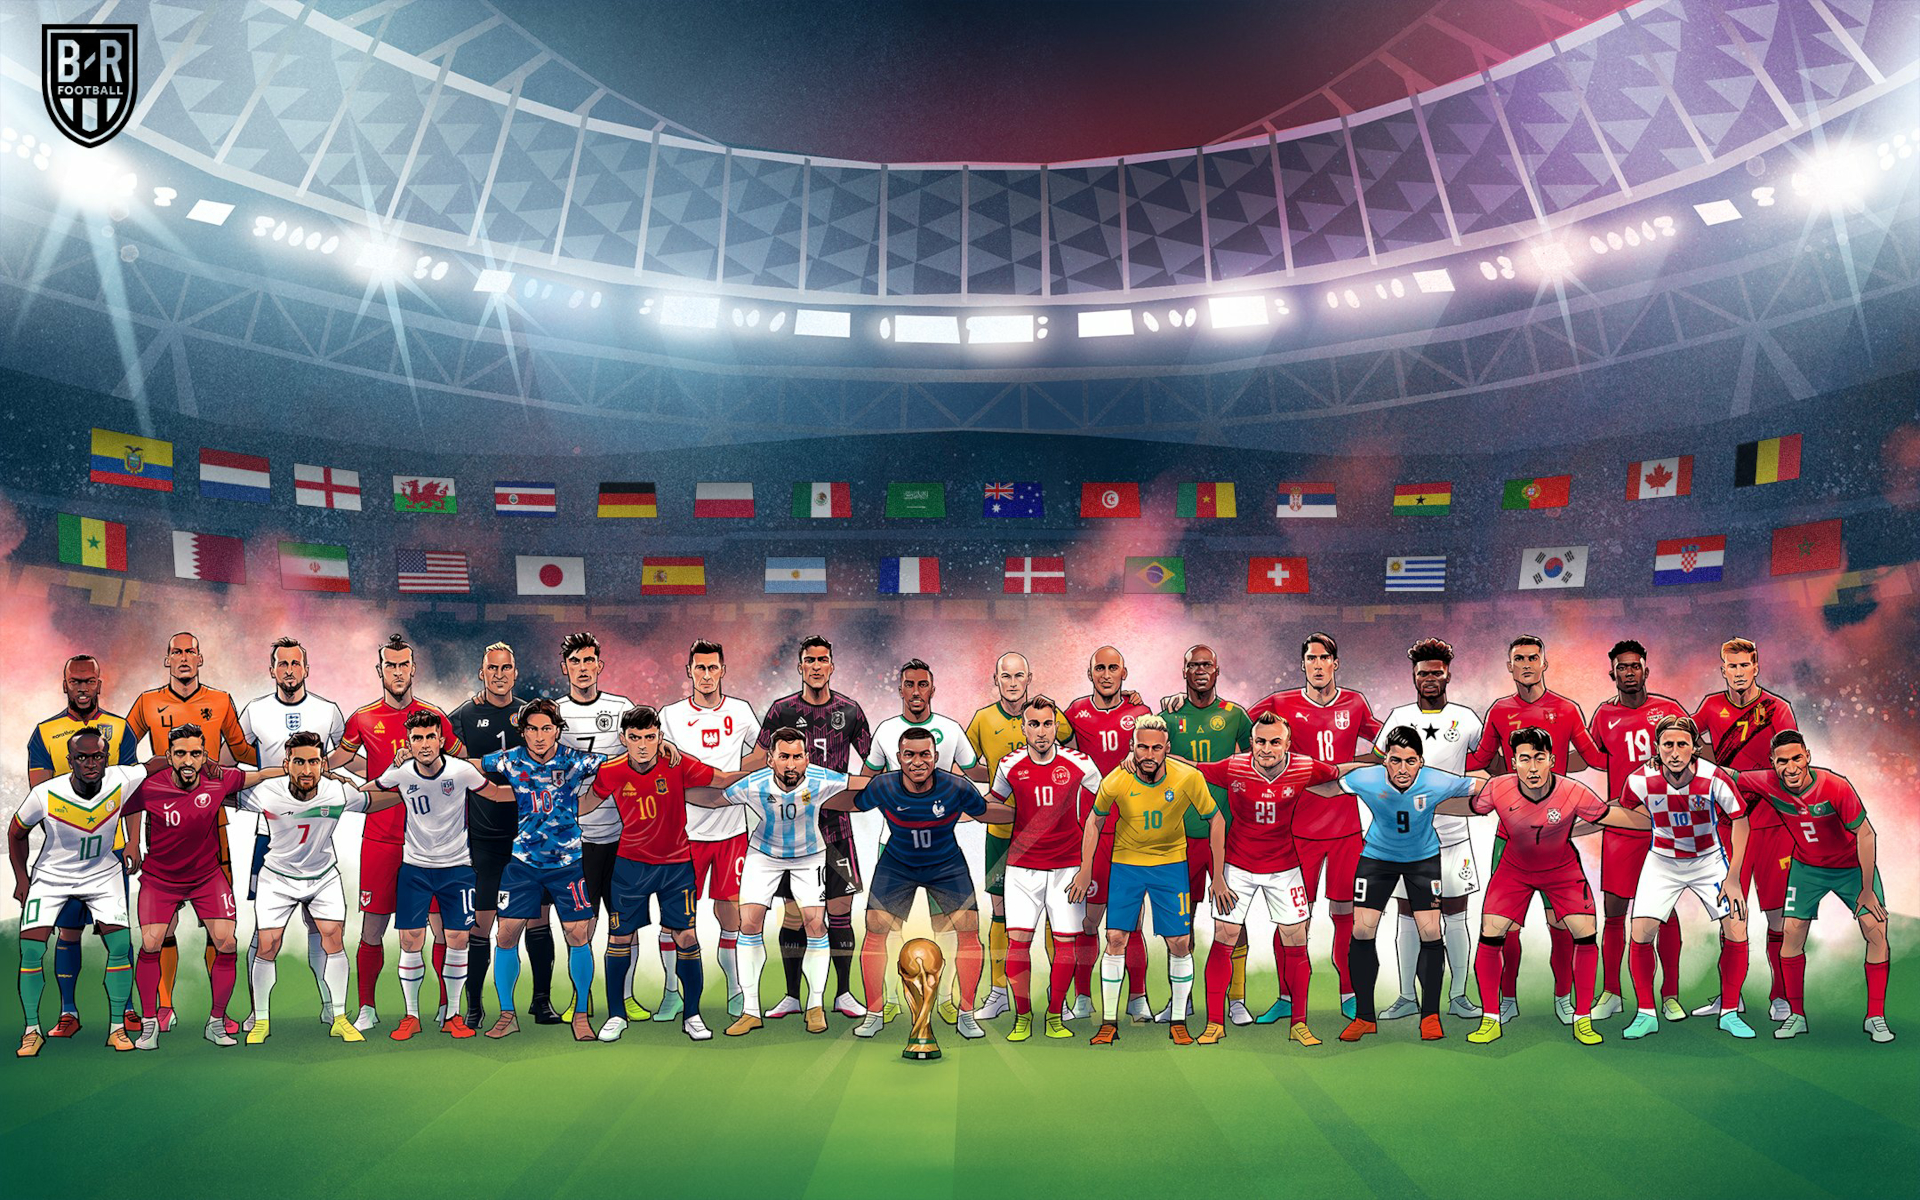

# Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression

In [3]:
#importing the .csv file
df=pd.read_csv("C:/Users/Abhra/OneDrive/Desktop/Pace_1st_Sem/players_1.csv")

In [4]:
df

Unnamed: 0                    Name            Position  Age  \
0             0           Kylian Mbappe      Centre-Forward   22   
1             1          Erling Haaland      Centre-Forward   21   
2             2              Harry Kane      Centre-Forward   28   
3             3           Jack Grealish         Left Winger   26   
4             4           Mohamed Salah        Right Winger   29   
..          ...                     ...                 ...  ...   
495         495  Giorgian de Arrascaeta  Attacking Midfield   27   
496         496             Ayoze Parez      Second Striker   28   
497         497              Alex Meret          Goalkeeper   24   
498         498         Duje Caleta-Car         Centre-Back   25   
499         499         Aritz Elustondo         Centre-Back   27   

     Market Value In Millions(£)  Country                          Club  \
0                          144.0   France           Paris Saint-Germain   
1                          135.0   Norway             Borussia Dortmund   
2                          108.0  England             Tottenham Hotspur   
3                           90.0  England               Manchester City   
4                           90.0    Egypt                  Liverpool FC   
..                           ...      ...                           ...   
495                         16.2  Uruguay  Clube de Regatas do Flamengo   
496                         16.2    Spain                Leicester City   
497                         16.2    Italy                    SSC Napoli   
498                         16.2  Croatia           Olympique Marseille   
499                         16.2    Spain                 Real Sociedad   

     Matches  Goals  Own Goals  Assists  Yellow Cards  Second Yellow Cards  \
0         16      7          0       11             3                    0   
1         10     13          0        4             1                    0   
2         16      7          0        2             2                    0   
3         15      2          0        3             1                    0   
4         15     15          0        6             1                    0   
..       ...    ...        ...      ...           ...                  ...   
495        0      0          0        0             0                    0   
496        8      1          0        3             0                    0   
497        5      0          0        0             0                    0   
498        8      0          0        0             2                    0   
499       15      3          0        1             4                    0   

     Red Cards  Number Of Substitute In  Number Of Substitute Out  G\A  
0            0                        0                         8   18  
1            0                        0                         1   17  
2            0                        2                         2    9  
3            0                        2                         8    5  
4            0                        0                         3   21  
..         ...                      ...                       ...  ...  
495          0                        0                         0    0  
496          1                        2                         5    4  
497          0                        0                         0    0  
498          0                        0                         2    0  
499          0                        1                         1    4  

[500 rows x 17 columns]

# EDA 

In [5]:
#renaming the unnamed column as Point
df.rename(columns={"Unnamed: 0":"Point"},inplace=True)

In [6]:
#checking whether the column has renamed. 
df.head()

Point            Name        Position  Age  Market Value In Millions(£)  \
0      0   Kylian Mbappe  Centre-Forward   22                        144.0   
1      1  Erling Haaland  Centre-Forward   21                        135.0   
2      2      Harry Kane  Centre-Forward   28                        108.0   
3      3   Jack Grealish     Left Winger   26                         90.0   
4      4   Mohamed Salah    Right Winger   29                         90.0   

   Country                 Club  Matches  Goals  Own Goals  Assists  \
0   France  Paris Saint-Germain       16      7          0       11   
1   Norway    Borussia Dortmund       10     13          0        4   
2  England    Tottenham Hotspur       16      7          0        2   
3  England      Manchester City       15      2          0        3   
4    Egypt         Liverpool FC       15     15          0        6   

   Yellow Cards  Second Yellow Cards  Red Cards  Number Of Substitute In  \
0             3                    0          0                        0   
1             1                    0          0                        0   
2             2                    0          0                        2   
3             1                    0          0                        2   
4             1                    0          0                        0   

   Number Of Substitute Out  G\A  
0                         8   18  
1                         1   17  
2                         2    9  
3                         8    5  
4                         3   21

In [7]:
#Checking information of the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Point                        500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Market Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [8]:
#Checking the null values in the dataset
df.isnull().sum()

Point                          0
Name                           0
Position                       0
Age                            0
Market Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
G\A                            0
dtype: int64

# Player position count

In [9]:
#Getting the count of players as per positions. 
df["Position"].value_counts()
# We see that 17.4% of the total players are registered as Center Back 

Position
Centre-Back           87
Central Midfield      74
Centre-Forward        70
Right Winger          48
Left Winger           46
Attacking Midfield    41
Defensive Midfield    41
Right-Back            30
Left-Back             23
Goalkeeper            19
Second Striker         8
Left Midfield          8
Right Midfield         5
Name: count, dtype: int64

In [10]:
import plotly.express as px

fig = px.bar(df,x = 'Position', color= 'Position')
fig.update_layout(showlegend=False)
fig.show()

In [11]:
#Here we are getting the unique values of age.
df["Age"].unique()

array([22, 21, 28, 26, 29, 30, 24, 27, 18, 34, 23, 25, 20, 19, 33, 36, 31,
       32, 17, 16], dtype=int64)

# Separating all players with respect of their clubs

In [12]:
#Segregating players on the basis of their clubs
teams=df.groupby(["Club","Name"])
teams.first()

Point            Position  Age  \
Club                    Name                                                  
AC Milan                Alessio Romagnoli      439         Centre-Back   26   
                        Alexis Saelemaekers    476        Right Winger   22   
                        Ante Rebic             199         Left Winger   28   
                        Brahim DÃ­az           342  Attacking Midfield   22   
                        Davide Calabria        307          Right-Back   24   
...                                            ...                 ...  ...   
Wolverhampton Wanderers Ruben Neves            117  Defensive Midfield   24   
Zenit St. Petersburg    Malcom                 362        Right Winger   24   
                        Sardar Azmoun          317      Centre-Forward   26   
                        Wendel                 468    Central Midfield   24   
                        Wilmar Barrios         491  Defensive Midfield   28   

                                             Market Value In Millions(£)  \
Club                    Name                                               
AC Milan                Alessio Romagnoli                           18.0   
                        Alexis Saelemaekers                         16.2   
                        Ante Rebic                                  28.8   
                        Brahim DÃ­az                                20.7   
                        Davide Calabria                             22.5   
...                                                                  ...   
Wolverhampton Wanderers Ruben Neves                                 37.8   
Zenit St. Petersburg    Malcom                                      19.8   
                        Sardar Azmoun                               22.5   
                        Wendel                                      16.2   
                        Wilmar Barrios                              16.2   

                                              Country  Matches  Goals  \
Club                    Name                                            
AC Milan                Alessio Romagnoli       Italy       11      0   
                        Alexis Saelemaekers   Belgium       16      0   
                        Ante Rebic            Croatia       11      2   
                        Brahim DÃ­az            Spain       11      4   
                        Davide Calabria         Italy       14      2   
...                                               ...      ...    ...   
Wolverhampton Wanderers Ruben Neves          Portugal       13      1   
Zenit St. Petersburg    Malcom                 Brazil       15      3   
                        Sardar Azmoun            Iran       18      9   
                        Wendel                 Brazil       20      4   
                        Wilmar Barrios       Colombia       16      0   

                                             Own Goals  Assists  Yellow Cards  \
Club                    Name                                                    
AC Milan                Alessio Romagnoli            0        0             1   
                        Alexis Saelemaekers          0        2             2   
                        Ante Rebic                   0        2             1   
                        Brahim DÃ­az                 0        2             3   
                        Davide Calabria              0        1             2   
...                                                ...      ...           ...   
Wolverhampton Wanderers Ruben Neves                  0        0             4   
Zenit St. Petersburg    Malcom                       0        5             1   
                        Sardar Azmoun                0        4             1   
                        Wendel                       0        2             3   
                        Wilmar Barrios               0        1             2   

                        

In [13]:
team_name = "FC Barcelona"
team_players = df.groupby("Club").get_group(team_name)
print(team_players)

     Point                     Name            Position  Age  \
9        9          Frenkie de Jong    Central Midfield   24   
16      16                    Pedri    Central Midfield   18   
48      48                Ansu Fati         Left Winger   19   
74      74  Marc-Andreas ter Stegen          Goalkeeper   29   
87      87          Ousmane Dembele        Right Winger   24   
108    108            Memphis Depay      Centre-Forward   27   
210    210             Sergino Dest          Right-Back   21   
271    271                     Gavi    Central Midfield   17   
279    279           Ronald AraÃºjo         Centre-Back   22   
398    398              Eric Garcia         Centre-Back   20   
454    454        Philippe Coutinho  Attacking Midfield   29   

     Market Value In Millions(£)        Country          Club  Matches  Goals  \
9                           81.0    Netherlands  FC Barcelona       13      0   
16                          72.0          Spain  FC Barcelona        

# Country-wise count of players

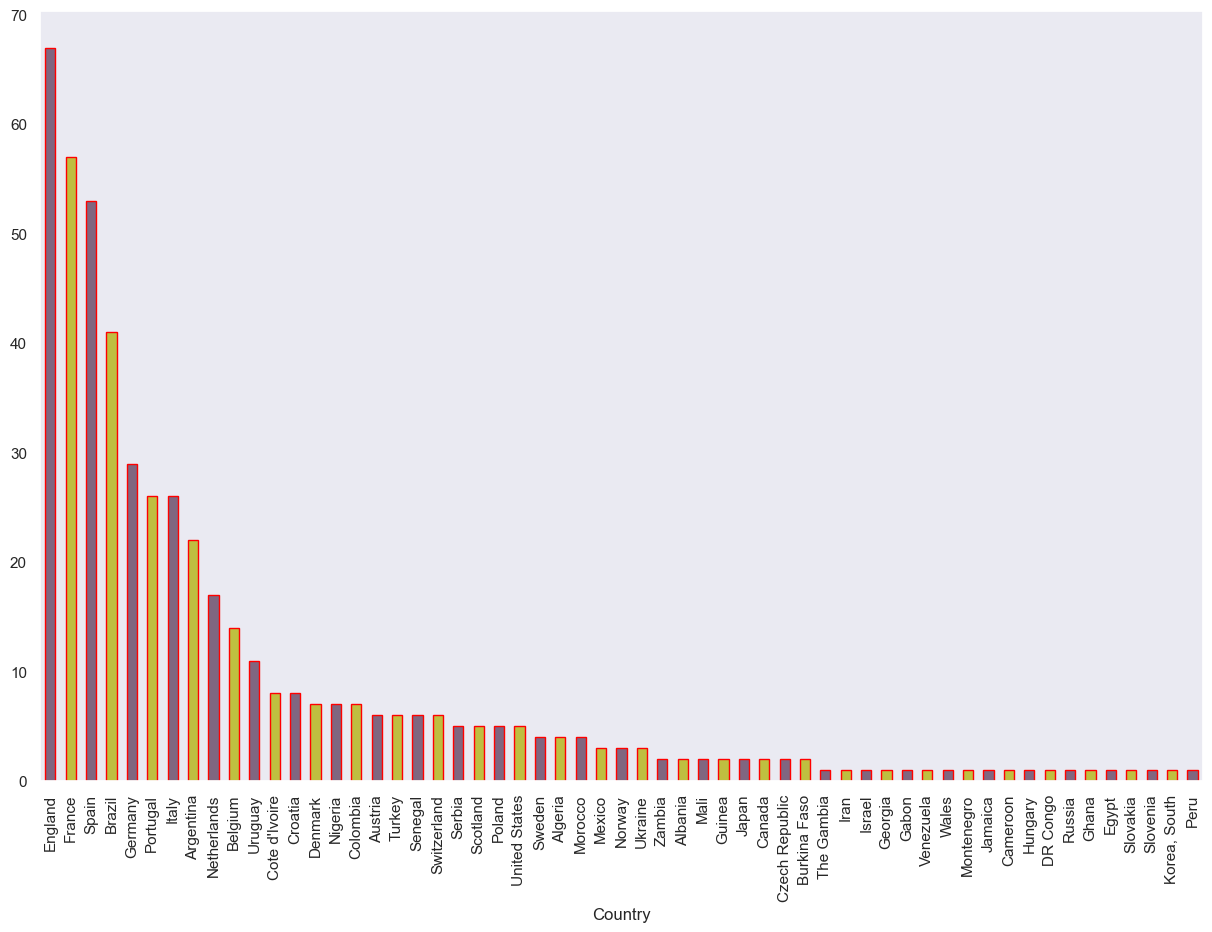

In [14]:
#Getting the total count of players according to the country. 

my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*7 


plt.figure(figsize=(15,10))
df["Country"].value_counts().plot(kind="bar",color=my_colors,edgecolor="Red")
plt.grid()
plt.show()

In [15]:
#Representing players by their market value
import plotly.express as px
fig = px.scatter(df,y= 'Market Value In Millions(£)', x='Name', color="Name")
fig.update_traces(marker_size=10)
fig.show()

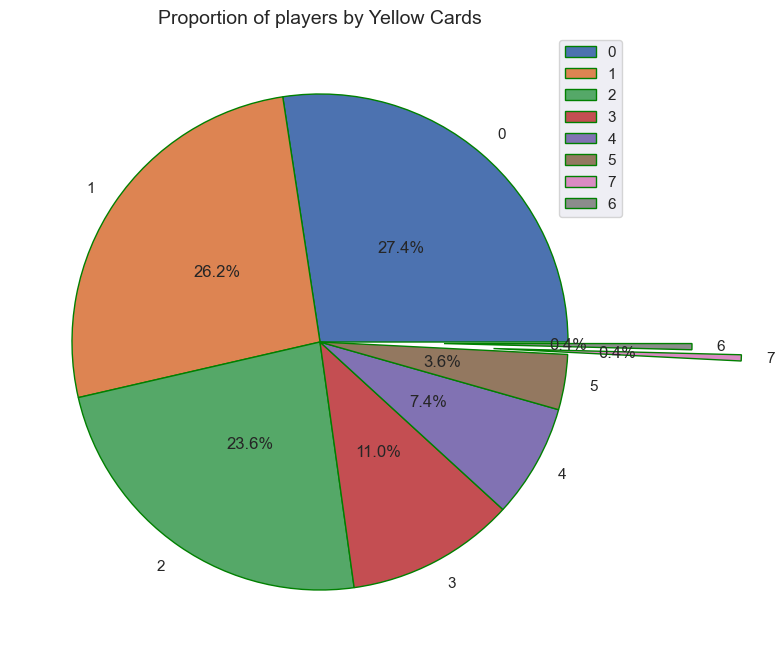

In [16]:
#Visualising the proportions of players by the number of yellow cards received. 
explode=(0,0,0,0,0,0,0.7,0.5)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
pie, ax = plt.subplots(figsize=[8,10])
labels = df["Yellow Cards"].value_counts().keys()
plt.pie(x=df["Yellow Cards"].value_counts(), autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=explode,shadow=False,
       wedgeprops = wp)
plt.legend()
plt.title("Proportion of players by Yellow Cards", fontsize=14);

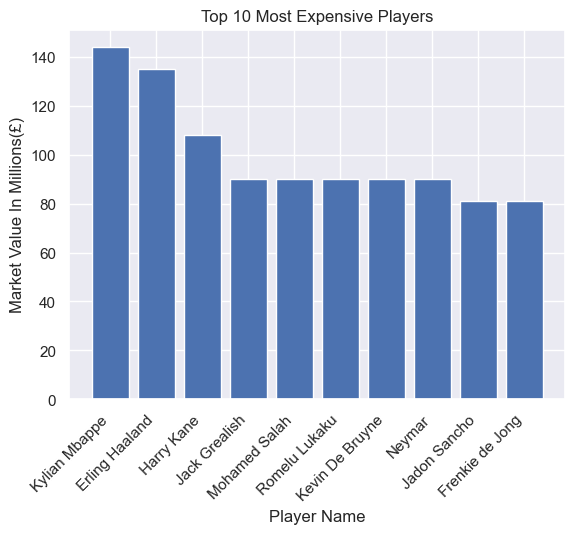

In [17]:
#Displaying the top 10 most expensive players.
import matplotlib.pyplot as plt

# Creating a data frame with top10 most expensive players
top10_df = df.iloc[0:10, :]

# Extracting player names and market values
player_names = top10_df['Name']
market_values = top10_df['Market Value In Millions(£)']

# Creating a bar plot
plt.bar(player_names, market_values)

# Adding labels and title to the plot
plt.xlabel('Player Name')
plt.ylabel('Market Value In Millions(£)')
plt.title('Top 10 Most Expensive Players')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Displaying the plot
plt.show()

# Showing comparison of players

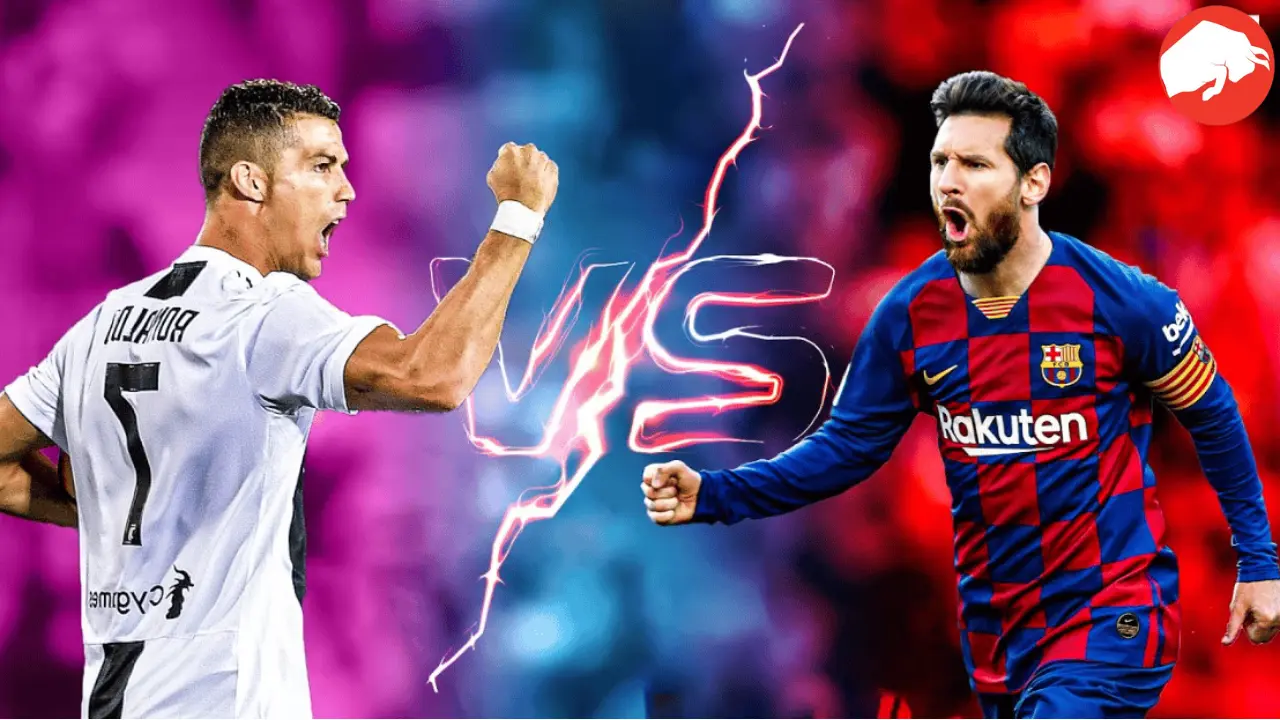

In [18]:
df[df["Name"] == "Lionel Messi"],df[df["Name"] == "Cristiano Ronaldo"]

(    Point          Name      Position  Age  Market Value In Millions(£)  \
 20     20  Lionel Messi  Right Winger   34                         72.0   
 
       Country                 Club  Matches  Goals  Own Goals  Assists  \
 20  Argentina  Paris Saint-Germain        8      3          0        0   
 
     Yellow Cards  Second Yellow Cards  Red Cards  Number Of Substitute In  \
 20             1                    0          0                        1   
 
     Number Of Substitute Out  G\A  
 20                         2    3  ,
      Point               Name        Position  Age  \
 113    113  Cristiano Ronaldo  Centre-Forward   36   
 
      Market Value In Millions(£)   Country               Club  Matches  Goals  \
 113                         40.5  Portugal  Manchester United       14     10   
 
      Own Goals  Assists  Yellow Cards  Second Yellow Cards  Red Cards  \
 113          0        1             4                    0          0   
 
      Number Of Substitute In  Nu

In [19]:
#Showing comparison of L.Messi and C.Ronaldo
#The reason why we are showing comparison of these two players becasue the debate will never end. 
#So you can see the graph and decide for yourself who the best player is. 
import plotly.graph_objects as go
df_sorted = df.sort_values(by='G\A', ascending=False)
labels=np.array([
    "Goals",
    "Assists",
    "G\A",
    "Matches",
    "Market Value In Millions(£)" 
])
stats=df_sorted.loc[20,labels].values
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='L.Messi'
))
stats=df_sorted.loc[113, labels].values
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='C.Ronaldo'
))
fig.update_layout(
    title="Market Value In Millions(£)",
    autosize=False,
    width=500,
    height=500,)
fig.show()

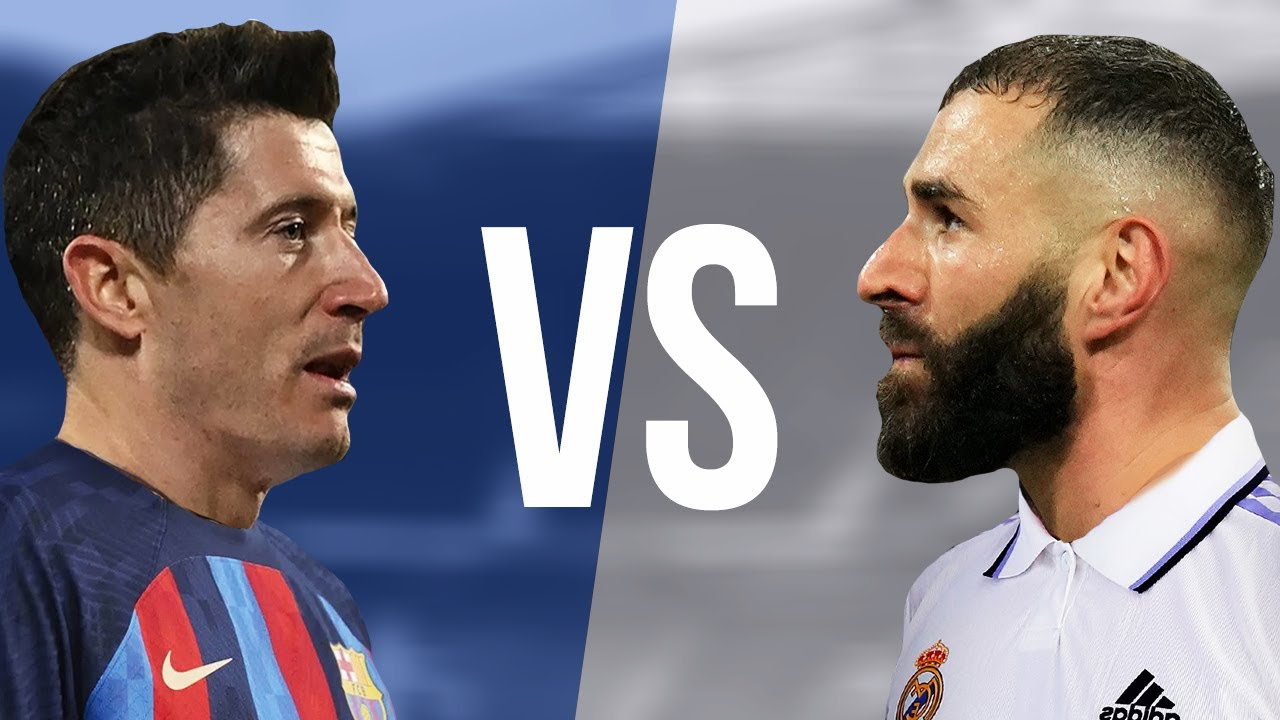

In [20]:
#Showing comparison of R.Lewandowski and K.Benzema
#The reason why we are comparing these two players is becasue these are the oldest top scoring players. 

df[df["Name"] == "Robert Lewandowski"],df[df["Name"] == "Karim Benzema"]

(    Point                Name        Position  Age  \
 63     63  Robert Lewandowski  Centre-Forward   33   
 
     Market Value In Millions(£) Country           Club  Matches  Goals  \
 63                         54.0  Poland  Bayern Munich       17     23   
 
     Own Goals  Assists  Yellow Cards  Second Yellow Cards  Red Cards  \
 63          0        2             0                    0          0   
 
     Number Of Substitute In  Number Of Substitute Out  G\A  
 63                        0                         5   25  ,
      Point           Name        Position  Age  Market Value In Millions(£)  \
 333    333  Karim Benzema  Centre-Forward   33                         22.5   
 
     Country         Club  Matches  Goals  Own Goals  Assists  Yellow Cards  \
 333  France  Real Madrid       15     14          0        8             0   
 
      Second Yellow Cards  Red Cards  Number Of Substitute In  \
 333                    0          0                        0   
 
      Num

In [21]:
import plotly.graph_objects as go
df_sorted = df.sort_values(by='G\A', ascending=False)
labels=np.array([
    "Goals",
    "Assists",
    "G\A",
    "Matches",
    "Market Value In Millions(£)"
])
stats=df_sorted.loc[63,labels].values
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='R.Lewandowski'
))
stats=df_sorted.loc[333, labels].values
fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='K.Benzema'
))
fig.update_layout(
    title="Market Value In Millions(£)",
    autosize=False,
    width=500,
    height=500,)
fig.show()

# Finding Players using various criteria


In [22]:
def matches(df):
    y=df.loc[471,"Matches"]
    o=df.loc[113,"Matches"]
    r=df.loc[0,"Market Value In Millions(£)"]
    a=df.loc[63,"Goals"]
    d=df.loc[238,"Assists"]
    print("Youngest Player Matches:",y)
    print("Oldest Player Matches:",o) 
    print("Most Expensive Player:",r)
    print("Most Goals Scored:",a)
    print("Most Assisted:",d)
matches(df)

Youngest Player Matches: 11
Oldest Player Matches: 14
Most Expensive Player: 144.0
Most Goals Scored: 23
Most Assisted: 12


# Data Analysis of PSG

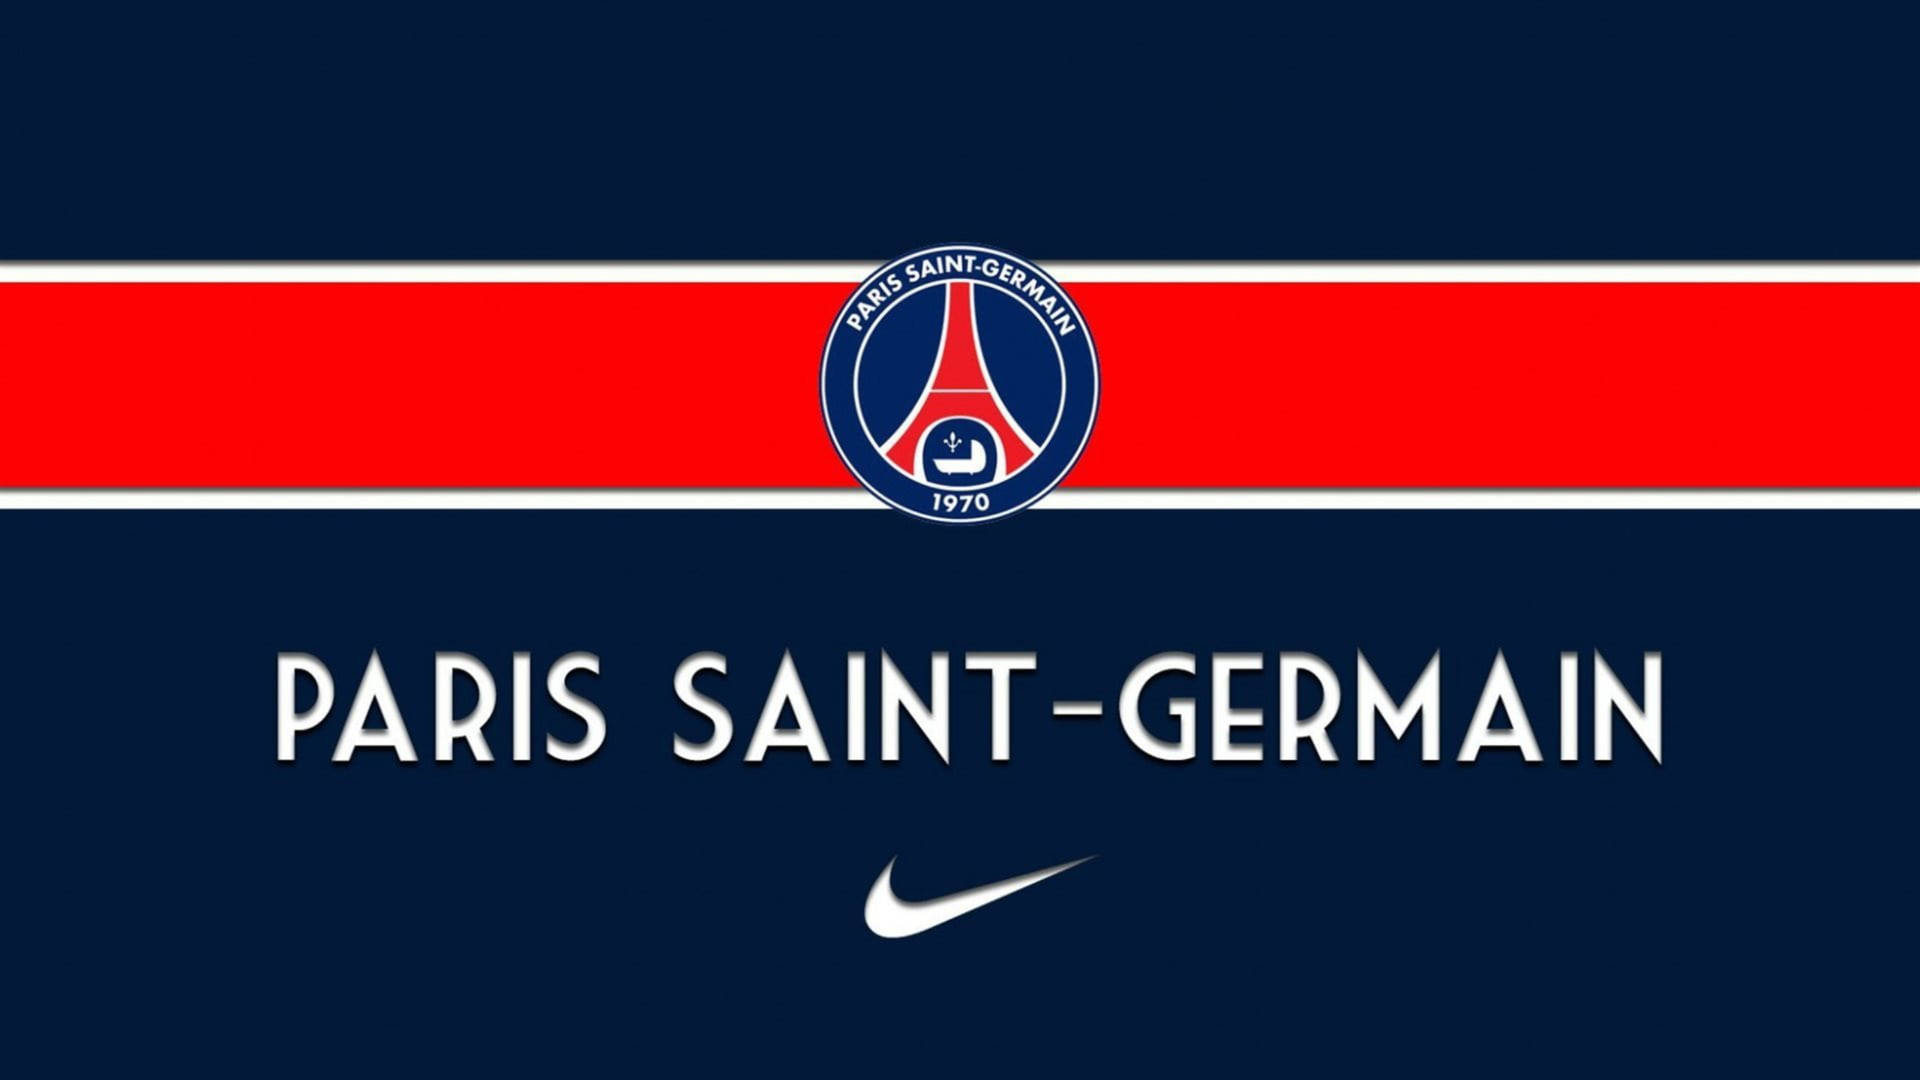

In [23]:
PSG_goals = df.loc[df['Club'] == 'Paris Saint-Germain', 'Goals'].sum()
print("PSG's total number of goals:", PSG_goals)

PSG's total number of goals: 26


In [24]:
PSG_assists = df.loc[df['Club'] == 'Paris Saint-Germain', 'Assists'].sum()
print("PSG's total number of assists:", PSG_assists)

PSG's total number of assists: 25


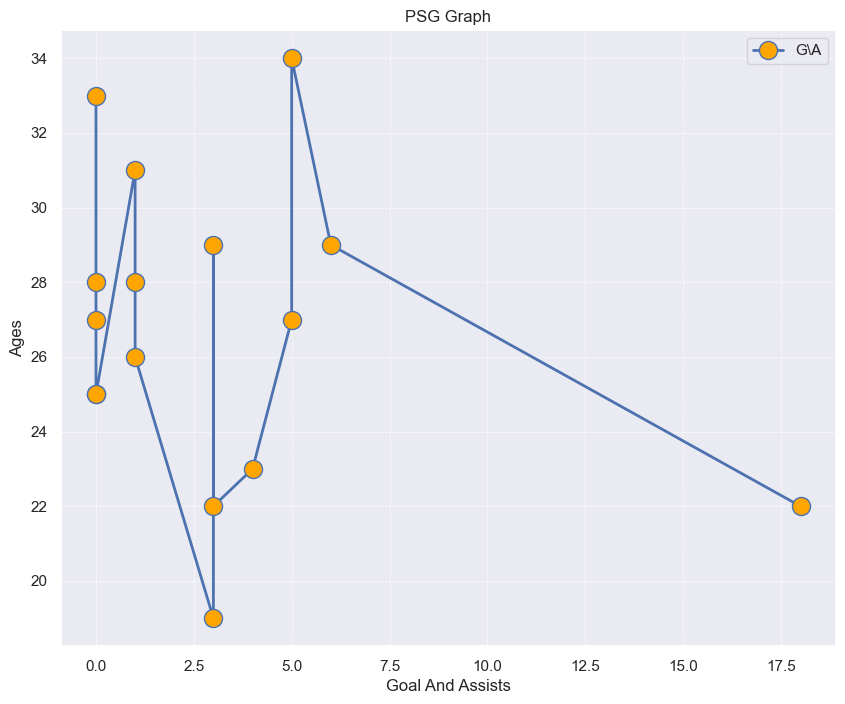

In [25]:
ages=[22,29,34,27,23,22,29,19,26,28,31,25,25,27,28,33]
g_and_a=[18,6,5,5,4,3,3,3,1,1,1,0,0,0,0,0]

plt.figure(figsize=(10,8))
plt.plot(g_and_a,ages,linewidth="2",label="G\A",marker="o",markersize=13,markerfacecolor="orange")
plt.grid(linestyle="--",linewidth=0.5)
plt.xlabel("Goal And Assists")
plt.ylabel("Ages")
plt.title("PSG Graph")
plt.legend()
plt.show()

# Predicting the number of goals scored per matches for the first 24 matches

In [26]:
#Using the linear regression to predict a players performance. 
y= df.Goals
x= df.Matches.values.reshape(-1,1)
print(x.shape,y.shape)
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
print(r_sq)
intercept = model.intercept_
slope = model.coef_
y_pred = intercept+ slope*x

(500, 1) (500,)
0.13562313791139846


Text(0.5, 1.0, 'Goals Vs Matches')

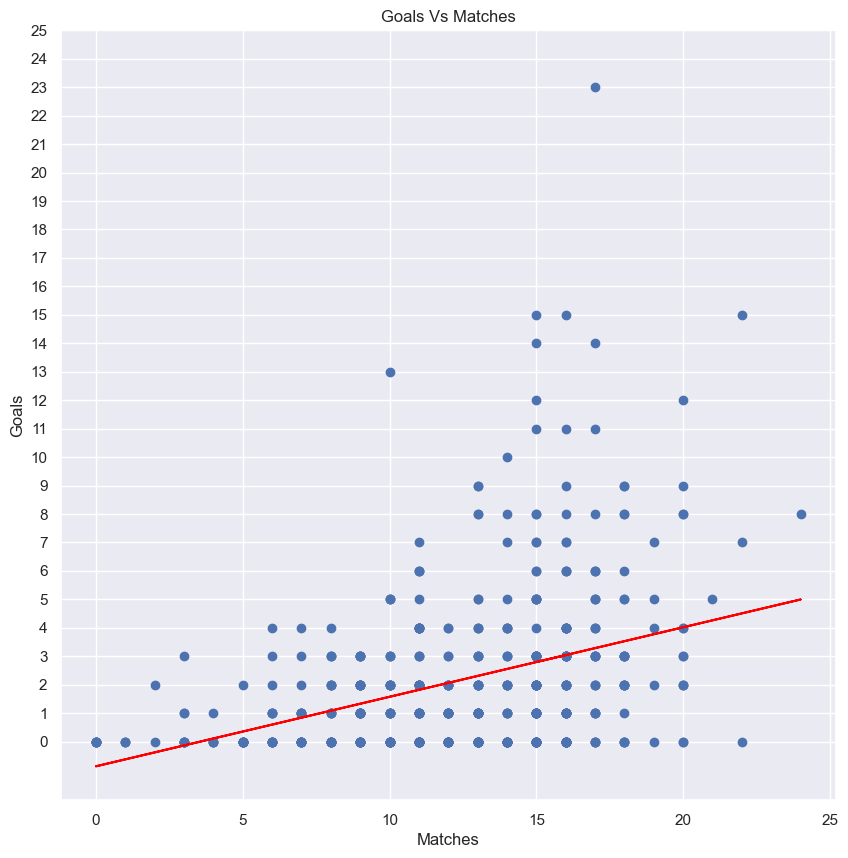

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,y_pred, c='red')

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.xlabel('Matches')
plt.ylabel('Goals')
plt.title('Goals Vs Matches')

In [28]:
#We see that the error % is very negligible, ie., 3%

# Prediciting Goals vs Matches for R Lewandowski using Linear Regression


In [29]:
# Filter data to only include Robert Lewandowski
lewandowski_data = df[df['Name'] == 'Robert Lewandowski']

# Sum up the number of matches
total_matches = lewandowski_data['Matches'].sum()

print("Robert Lewandowski has played a total of", total_matches, "matches.")

Robert Lewandowski has played a total of 17 matches.


In [30]:
Lewandowski_goals = df.loc[df['Name'] == 'Robert Lewandowski', 'Goals'].sum()
print("Robert Lewandowski total number of goals:", Lewandowski_goals)

Robert Lewandowski total number of goals: 23


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data from the CSV file
df=pd.read_csv("C:/Users/Abhra/OneDrive/Desktop/Pace_1st_Sem/players_1.csv")

# Filter data to only include Robert Lewandowski
lewandowski_data = df[df['Name'] == 'Robert Lewandowski']

# Extract the number of goals and matches played
goals = lewandowski_data['Goals'].values
matches_played = lewandowski_data['Matches'].values

# Calculate the average number of goals per match played
goals_per_match = goals / matches_played

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(matches_played.reshape(-1, 1), goals_per_match.reshape(-1, 1))

# Use the model to predict the number of matches it will take to reach 100 goals
matches_to_100_goals = (100 / model.predict([[1]])[0])[0]

print(f"It will take approximately {matches_to_100_goals:.1f} matches for Robert Lewandowski to reach 100 goals.")

It will take approximately 73.9 matches for Robert Lewandowski to reach 100 goals.


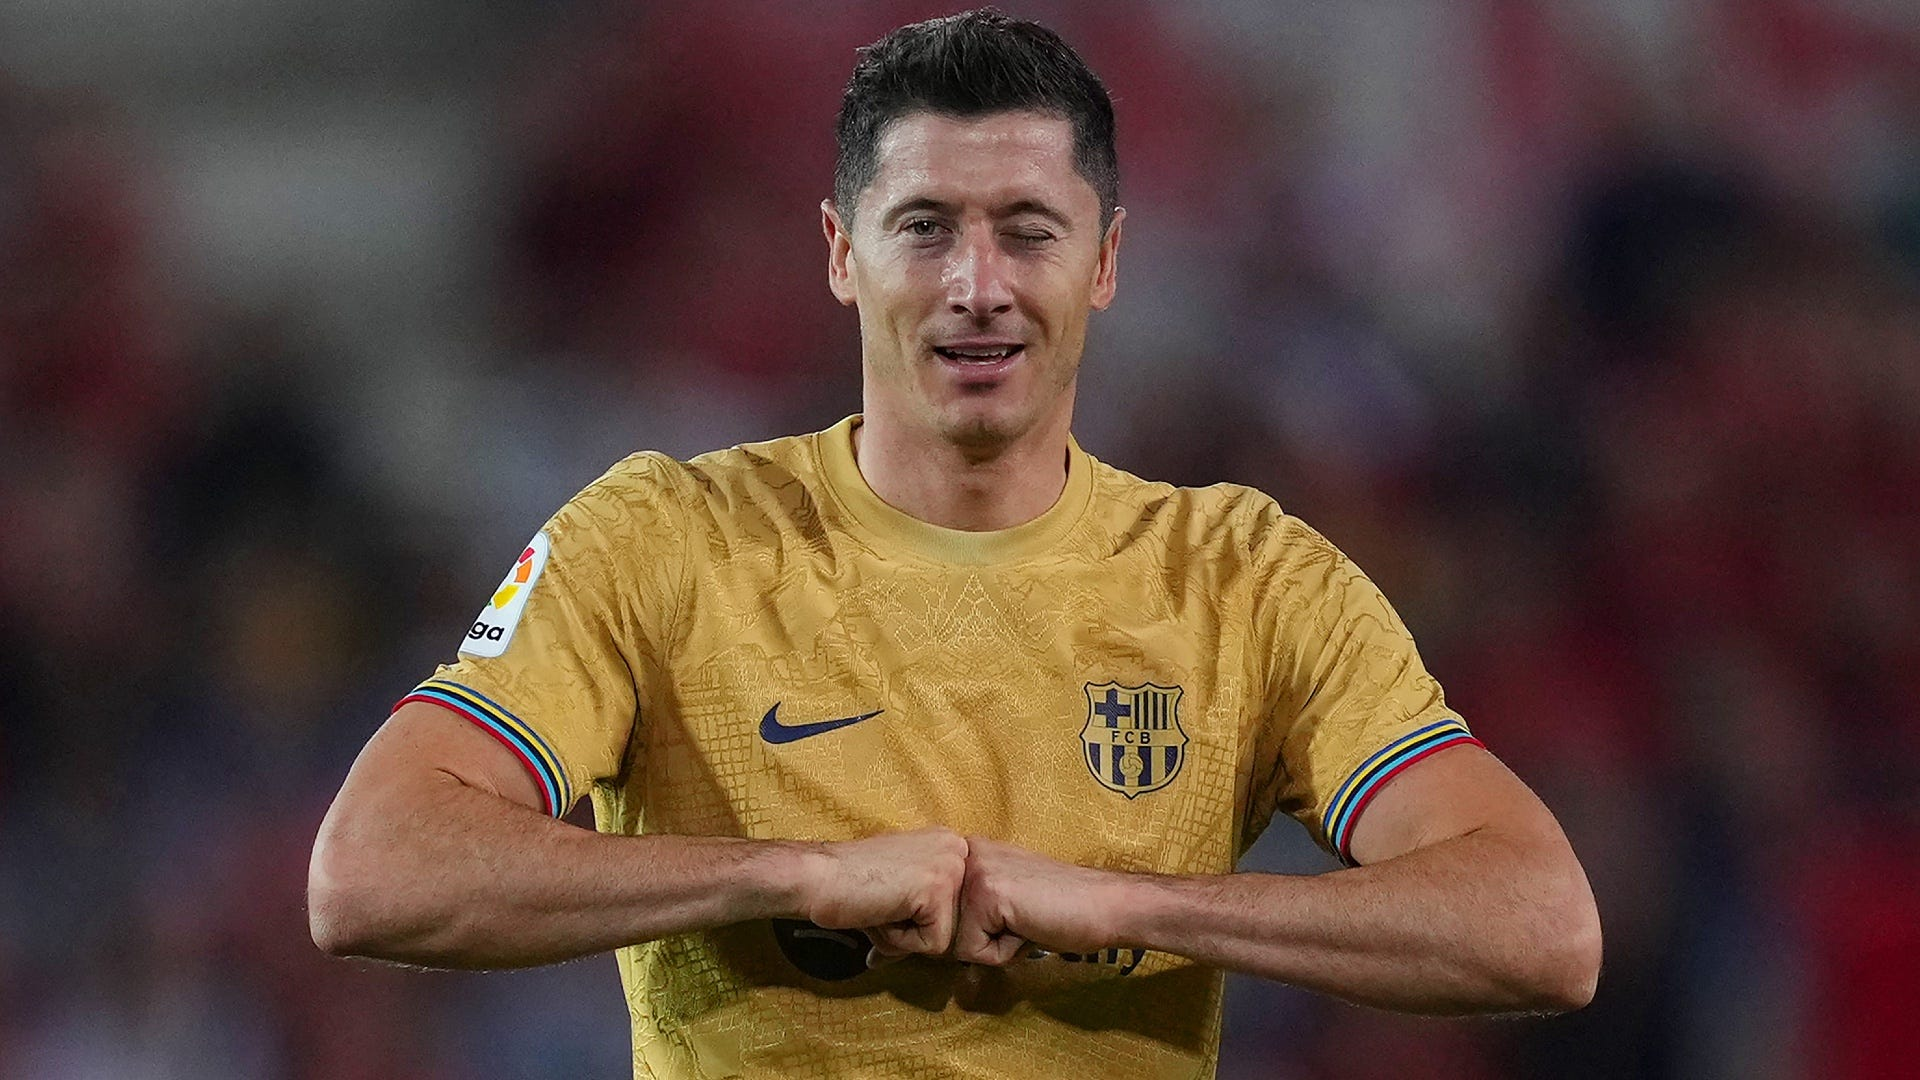

  #                                                 THANK YOU

In [114]:
#Conclusion: WE HAVE BUILT A MODEL WHICH PREDICTED THE NO OF GOALS SCORED FOR THE FIRST 23 MATCHES.
#WE ALSO MADE ANOTHER MODEL WHICH PREDICTED THE NO OF MATCHES LEWANDOWSKI WILL TAKE TO SCORE 100 GOALS. 